# Step 1 Prepare Road Network

In [1]:
import networkx as nx

In [2]:
import osmnx as ox
import pandas as pd

In [3]:
road_folder = "C:/Users/P.Thukaraka/Desktop/data/osm/colombo_road"
path='C:/Users/P.Thukaraka/Desktop/data/osm/central/central.graphml'
#road_graph = ox.load_graphml(filename=road_file, folder=road_folder)
road_graph1=ox.load_graphml(filepath=path, node_dtypes=None, edge_dtypes=None, graph_dtypes=None)
road_graph_utm1 = ox.project_graph(road_graph1)

In [4]:
road_folder = 'C:/Users/P.Thukaraka/Desktop/data/osm/colombo_road'
path='C:/Users/P.Thukaraka/Desktop/data/osm/colombo_road/western.graphml'
#road_graph = ox.load_graphml(filename=road_file, folder=road_folder)
road_graph2=ox.load_graphml(filepath=path, node_dtypes=None, edge_dtypes=None, graph_dtypes=None)
road_graph_utm2 = ox.project_graph(road_graph2)

In [5]:
road_graph=nx.compose(road_graph1,road_graph2)

In [6]:
road_graph_utm = ox.project_graph(road_graph)

In [7]:
drivers=pd.read_csv("C:/Users/P.Thukaraka/Downloads/driver_vehicle_model.csv")

In [8]:
drivers

,Unnamed: 0,driver_id,vehicle_model
0,0,0038263cc90dfa55d621a6425e46020136a318d12b9743...,2
1,1,006ed08c7fe1278c64a3c5dbac78c7b0a9cec8d7316c51...,1
2,2,00c6dda371d7192310a3b12f05c8c82d56e1b7a39537c2...,1
3,3,00ce195f11cfa5d5e228095893a866e2ec79cf3aa1c423...,1
4,4,010cbc4ccc307d3b4fd7214c8d6c76d700ec0561fc467a...,1
...,...,...,...
1070,1070,fcc50d56654bd6e3fe3aaa7eabae4aed68cebc9ae1d0cc...,4
1071,1071,fdddb7ff6f41dadcdfd96eda412d6cf5dae1de323112b7...,1
1072,1072,fdf5ca9f3b4300b5e81144d90ceda40ccff2c77ec5bc31...,1
1073,1073,fe4abf2fbd236caeb3e04b36379e7394bfb67c1beef1b4...,1


In [9]:
drivers.drop(['Unnamed: 0'], axis=1, inplace=True)
drivers["driver_id"]

0       0038263cc90dfa55d621a6425e46020136a318d12b9743...
1       006ed08c7fe1278c64a3c5dbac78c7b0a9cec8d7316c51...
2       00c6dda371d7192310a3b12f05c8c82d56e1b7a39537c2...
3       00ce195f11cfa5d5e228095893a866e2ec79cf3aa1c423...
4       010cbc4ccc307d3b4fd7214c8d6c76d700ec0561fc467a...
                              ...                        
1070    fcc50d56654bd6e3fe3aaa7eabae4aed68cebc9ae1d0cc...
1071    fdddb7ff6f41dadcdfd96eda412d6cf5dae1de323112b7...
1072    fdf5ca9f3b4300b5e81144d90ceda40ccff2c77ec5bc31...
1073    fe4abf2fbd236caeb3e04b36379e7394bfb67c1beef1b4...
1074    ff829fe752121ac0a41d2e262615d45572f001419f895a...
Name: driver_id, Length: 1075, dtype: object

### 1.1 Extract Edge Data from Road Network

def road_graph_to_edge_gpd(road_graph):
    '''
    store road segments into a geppandas dataframe
    :param road_graph: a road network graph in networkx
    :return gpd_edges: a geopandas dataframe of road segments
    '''
    from shapely.geometry import Point, LineString
    import geopandas as gpd
    #froms = []
    #tos = []
    #geometries = []
    c=0
    gpd_edges = gpd.GeoDataFrame(columns=('from','to','geometry','length','highway'))
    for e_from, e_to, data in road_graph.edges(data=True):
        c+=1
        print(c)
        #froms.append(e_from)
        #tos.append(e_to)
        if 'geometry' in data:
            #geometries.append(data['geometry'])
            s = gpd.GeoSeries({'from':e_from, 
                               'to':e_to, 
                               'geometry':data['geometry'], 
                               'length':data['length'],
                               'highway':data['highway']})
            gpd_edges = gpd_edges.append(s, ignore_index=True)
        else:
            p1 = Point(road_graph.nodes[e_from]['x'], road_graph.nodes[e_from]['y'])
            p2 = Point(road_graph.nodes[e_to]['x'], road_graph.nodes[e_to]['y'])
            #geometries.append(LineString((p1, p2)))
            data.update({'geometry':LineString((p1, p2))})
            s = gpd.GeoSeries({'from':e_from, 
                               'to':e_to, 
                               'geometry':LineString((p1, p2)), 
                               'length':data['length'],
                               'highway':data['highway']})
            gpd_edges = gpd_edges.append(s, ignore_index=True)

    #gpd_edges = gpd.GeoDataFrame(data={'from': froms, 'to': tos, 'geometry': geometries})
    gpd_edges.crs = road_graph.graph['crs']
    gpd_edges.name = 'edges'
    # create bounding box for each edge geometry
    gpd_edges['bbox'] = gpd_edges.apply(lambda row: row['geometry'].bounds, axis=1)
    return gpd_edges

gpd_edges_utm = road_graph_to_edge_gpd(road_graph_utm)
gpd_edges_utm.head()

In [10]:
loaded_gdf2=pd.read_csv("C:/Users/P.Thukaraka/Desktop/central_data.csv")

In [11]:
loaded_gdf1=pd.read_csv("C:/Users/P.Thukaraka/Desktop/western_data.csv")

In [12]:
loaded_gdf=pd.concat([loaded_gdf1, loaded_gdf2])

In [13]:
loaded_gdf

,from,to,geometry,length,highway,bbox,minx,miny,maxx,maxy
0,245519560,245519575,LINESTRING (397331.1361488708 736776.324841928...,148.019,secondary,"(397331.1361488708, 736639.4074819647, 397384....",397331.136149,736639.407482,397384.215483,736776.324842
1,245519560,5176906299,LINESTRING (397331.1361488708 736776.324841928...,60.641,secondary,"(397315.43962857814, 736776.3248419286, 397331...",397315.439629,736776.324842,397331.136149,736834.076733
2,245519560,7448531613,LINESTRING (397331.1361488708 736776.324841928...,164.582,residential,"(397200.63795636094, 736692.2725808757, 397331...",397200.637956,736692.272581,397331.136149,736776.324842
3,245519575,245519579,LINESTRING (397384.2154834146 736639.407481964...,228.132,secondary,"(397165.21585523034, 736579.1114031723, 397384...",397165.215855,736579.111403,397384.215483,736639.407482
4,245519575,5016718667,LINESTRING (397384.2154834146 736639.407481964...,250.299,secondary,"(397384.21548341465, 736398.5668867913, 397435...",397384.215483,736398.566887,397435.872836,736639.407482
...,...,...,...,...,...,...,...,...,...,...
61075,8814994092,8814994095,LINESTRING (480491.3066103494 773232.539174372...,41.670,residential,"(480491.30661034945, 773232.5391743727, 480513...",480491.306610,773232.539174,480513.663327,773264.921068
61076,8814994099,8814994095,LINESTRING (480566.1341172313 773221.390103587...,68.309,residential,"(480513.66332724725, 773221.3901035874, 480566...",480513.663327,773221.390104,480566.134117,773264.921068
61077,8814994116,8815094721,LINESTRING (480468.6775298979 773739.030044396...,75.715,residential,"(480468.67752989795, 773683.6931655777, 480519...",480468.677530,773683.693166,480519.608087,773739.030044
61078,8815094718,8815094721,LINESTRING (480479.464355864 773668.8396601261...,44.217,residential,"(480479.46435586404, 773668.8396601261, 480519...",480479.464356,773668.839660,480519.608087,773684.569989


In [14]:
from geopandas import GeoDataFrame
from shapely import wkt

geo_df = GeoDataFrame(loaded_gdf[["from", "to","geometry","length","highway","bbox"]],  geometry=loaded_gdf.geometry.apply(wkt.loads))

In [15]:
 geo_df['bbox'] = geo_df.apply(lambda row: row['geometry'].bounds, axis=1)

In [16]:
gpd_edges_utm=geo_df

In [17]:
geo_df

,from,to,geometry,length,highway,bbox
0,245519560,245519575,"LINESTRING (397331.136 736776.325, 397342.285 ...",148.019,secondary,"(397331.1361488708, 736639.4074819647, 397384...."
1,245519560,5176906299,"LINESTRING (397331.136 736776.325, 397322.799 ...",60.641,secondary,"(397315.4396285781, 736776.3248419286, 397331...."
2,245519560,7448531613,"LINESTRING (397331.136 736776.325, 397292.662 ...",164.582,residential,"(397200.6379563609, 736692.2725808757, 397331...."
3,245519575,245519579,"LINESTRING (397384.215 736639.407, 397347.099 ...",228.132,secondary,"(397165.2158552303, 736579.1114031723, 397384...."
4,245519575,5016718667,"LINESTRING (397384.215 736639.407, 397399.075 ...",250.299,secondary,"(397384.2154834146, 736398.5668867913, 397435...."
...,...,...,...,...,...,...
61075,8814994092,8814994095,"LINESTRING (480491.307 773232.539, 480493.542 ...",41.670,residential,"(480491.3066103494, 773232.5391743727, 480513...."
61076,8814994099,8814994095,"LINESTRING (480566.134 773221.390, 480513.663 ...",68.309,residential,"(480513.6633272473, 773221.3901035874, 480566...."
61077,8814994116,8815094721,"LINESTRING (480468.678 773739.030, 480515.613 ...",75.715,residential,"(480468.6775298979, 773683.6931655777, 480519...."
61078,8815094718,8815094721,"LINESTRING (480479.464 773668.840, 480501.836 ...",44.217,residential,"(480479.464355864, 773668.8396601261, 480519.6..."


### 1.2 Add max speed information

In [18]:
def get_max_speed(highway):
    '''
    return the corresponding max speed in kmph 
    '''
    if highway == 'mortorway':
        return 27.78
    elif highway == 'mortorway_link':
        return 16.67
    elif highway == 'trunk':
        return 19.44
    elif highway == 'trunk_link':
        return 13.89
    elif highway == 'primary':
        return 19.44
    elif highway == 'primary_link':
        return 13.89
    elif highway == 'secondary':
        return 19.44
    elif highway == 'secondary_link':
        return 13.89
    elif highway == 'residential':
        return 13.89
    elif highway == 'teritiary':
        return 19.44
    elif highway == 'teritiary_link':
        return 13.89
    elif highway == 'living_street':
        return 5.55
    elif highway == 'road':
        return 5.55
    elif highway == 'service':
        return 5.55
    else:
        return 13.89
        
    
def get_max_speeds(gpd_edges_utm):
    max_speeds = []
    for idx, row in gpd_edges_utm.iterrows():
        if isinstance(row['highway'], list):
            max_speed1 = get_max_speed(row['highway'][0])
            max_speed2 = get_max_speed(row['highway'][1])
            if row['length'] > 100:
                max_speed = max(max_speed1, max_speed2)
                max_speeds.append(max_speed)
            else:
                max_speed = min(max_speed1, max_speed2)
                max_speeds.append(max_speed)
        else:
            max_speeds.append(get_max_speed(row['highway']))
    return max_speeds


max_speeds = get_max_speeds(gpd_edges_utm)
gpd_edges_utm['max speed'] = max_speeds
gpd_edges_utm.head()

,from,to,geometry,length,highway,bbox,max speed
0,245519560,245519575,"LINESTRING (397331.136 736776.325, 397342.285 ...",148.019,secondary,"(397331.1361488708, 736639.4074819647, 397384....",19.44
1,245519560,5176906299,"LINESTRING (397331.136 736776.325, 397322.799 ...",60.641,secondary,"(397315.4396285781, 736776.3248419286, 397331....",19.44
2,245519560,7448531613,"LINESTRING (397331.136 736776.325, 397292.662 ...",164.582,residential,"(397200.6379563609, 736692.2725808757, 397331....",13.89
3,245519575,245519579,"LINESTRING (397384.215 736639.407, 397347.099 ...",228.132,secondary,"(397165.2158552303, 736579.1114031723, 397384....",19.44
4,245519575,5016718667,"LINESTRING (397384.215 736639.407, 397399.075 ...",250.299,secondary,"(397384.2154834146, 736398.5668867913, 397435....",19.44


# Step2: Load Trajectory

In [19]:
def read_trip(filename):
    import pandas as pd
    import geopandas as gpd
    from shapely.geometry import Point
    col_names = ['Unnamed: 0', 'driver_id', 'timestamp','latitude','longtitude','time','tripid']
    trip = pd.read_csv(filename, header=None, names=col_names)
    trip.drop(['Unnamed: 0','driver_id'], axis=1, inplace=True)
    trip['geometry'] = trip.apply(lambda z: Point(z.longtitude, z.latitude), axis=1)
    trip = gpd.GeoDataFrame(trip)
    return trip

### coordinate transformation
def transform_coordinates(point, crs, to_crs):
    import osmnx as ox
    #return ox.project_geometry(point, crs=None, to_crs=None, to_latlong=False)
    return ox.projection.project_geometry(point,crs=crs, to_crs=to_crs)[0]

In [20]:
import pandas as pd

In [21]:
# trip_folder = 'D:/MapMatchingPython/data/trips'
#trip_file = trip_folder + '/trip_0.txt'
#trip_file = "C:/Users/Dilani/Desktop/MM/182206535.txt"
trip = read_trip("C:/Users/P.Thukaraka/Desktop/drivers_trip/910d26c1e71d01526f727c8d9d24f5318f152bb288d307c0b90cba2c10291660/188890164.txt")
# coordinate transformation
trip.head()

,timestamp,latitude,longtitude,time,tripid,geometry
0,1573028778,6.910346,79.866623,2019-11-06 13:56:18,188890164,POINT (79.86662 6.91035)
1,1573028788,6.910345,79.866623,2019-11-06 13:56:28,188890164,POINT (79.86662 6.91035)
2,1573028798,6.910170,79.866524,2019-11-06 13:56:38,188890164,POINT (79.86652 6.91017)
3,1573028808,6.909702,79.866287,2019-11-06 13:56:48,188890164,POINT (79.86629 6.90970)
4,1573028818,6.909566,79.866692,2019-11-06 13:56:58,188890164,POINT (79.86669 6.90957)


In [22]:
crs = road_graph.graph['crs']
to_crs = road_graph_utm.graph['crs']
trip['geometry_utm'] = trip.apply(lambda row: transform_coordinates(row['geometry'], crs, to_crs), axis=1)
trip.head()

,timestamp,latitude,longtitude,time,tripid,geometry,geometry_utm
0,1573028778,6.910346,79.866623,2019-11-06 13:56:18,188890164,POINT (79.86662 6.91035),POINT (374785.6142418134 763986.9157268729)
1,1573028788,6.910345,79.866623,2019-11-06 13:56:28,188890164,POINT (79.86662 6.91035),POINT (374785.6141163166 763986.8630039799)
2,1573028798,6.910170,79.866524,2019-11-06 13:56:38,188890164,POINT (79.86652 6.91017),POINT (374774.6091173163 763967.539904554)
3,1573028808,6.909702,79.866287,2019-11-06 13:56:48,188890164,POINT (79.86629 6.90970),POINT (374748.3530967186 763915.8812646595)
4,1573028818,6.909566,79.866692,2019-11-06 13:56:58,188890164,POINT (79.86669 6.90957),POINT (374792.9960446568 763900.6962555008)


# Step3: Query candidates

### Step3.1: Build R-tree Index for Road Network

In [23]:
def build_rtree_index_edges(gpd_edges):
    '''
    build a r-tree index for road segments
    input:
        gpd_edges: a geopandas dataframe that contains road segments (edge geometries)
    output:
        idx: a r-tree index of the edge geometries
    '''
    # r-tree index for edges
    from rtree import index
    p = index.Property()
    idx = index.Index(properties=p)
    for index, row in gpd_edges.iterrows():
        idx.insert(index, row['bbox'], obj=row)
    return idx

edge_idx = build_rtree_index_edges(gpd_edges_utm)

### Step3.2 Query

In [24]:
def query_k_nearest_road_segments(edge_idx, point, k):
    from shapely.geometry import Point, LineString
    from shapely.ops import nearest_points
    import pandas as pd
    '''
    query k-nearest road segments of a given point
    :param edge_idx: the road segments r-tree index
    :param point: the given point
    :param k: the number of segments needed to query
    :return: k candidates as a pandas DataFrame
    '''
    candidates = pd.DataFrame(columns=('distance', 'from', 'to', 'proj_point', 'road','highway'))
    hits = edge_idx.nearest((point.x, point.y, point.x, point.y), k, objects=True)
    for item in hits:
        results = nearest_points(point, item.object['geometry'])
        d = point.distance(results[1])
        s = pd.Series({'distance':d,
                       'from':item.object['from'], 
                       'to':item.object['to'], 
                       'proj_point':results[1],
                      'road':item.object,
                      'highway':item.object['highway']
                       })
        candidates = candidates.append(s, ignore_index=True)
    #candidates['observation prob'] = candidates.apply(lambda row: normal_distribution())
    candidates.sort_values(by='distance', axis=0, inplace=True)
    return candidates


def find_candidates(trip, road_idx, k):
    '''
    given a trip, find candidates points for each point in the trip
    :param trip: a GPS trajectory (without coordinates transform)
    :param road_idx: road segments r-tree index of the corresponding road network
    :param k: the number of candidates
    :return: the trip with candidates
    '''
    candi_list = []
    #point_list = []
    #crs = road_graph.graph['crs']
    #to_crs = road_graph_utm.graph['crs']
    for i in range(0, len(trip)):
        #candidates = []
        #point_utm = ox.project_geometry(trip.iloc[i]['geometry'], crs=crs, to_crs=to_crs)[0]
        #point_list.append(point_utm)
        candidates = query_k_nearest_road_segments(edge_idx, trip.iloc[i]['geometry_utm'], k)
        
        candi_list.append(candidates)
    trip['candidates'] = candi_list
    #print(candi_list[0])
    #trip['geometry_utm'] = point_list
    #return trip

In [25]:
k = 3
find_candidates(trip, edge_idx, k)
#trip.head()

# Step 4: HMM based Map Matching

### Step 4.1 Measurement Probabilities

In [26]:
def normal_distribution(mu, sigma, x):
    '''
    calculate normal distribution values
    input:
    mu: the mean value
    sigma; the standard deviation
    x: the given variables
    output:
    the probabilities of given input variables x
    '''
    import numpy as np
    return 1.0/(sigma * np.sqrt(2*np.pi)) * ( np.exp(-1.0 * (np.array(x)-mu)**2 / (2 * sigma**2)) )

#x = [10,20,30,40,50]
#mu = 0
#sigma = 20
#normal_distribution(mu,sigma,x)
def calculate_observation_probability(trip, mu, sigma):
    for i in range(len(trip)):
        trip.iloc[i]['candidates']['observation prob']=trip.iloc[i]['candidates'].apply(
            lambda row: normal_distribution(mu,sigma,row['distance']), 
            axis=1)

In [27]:
mu = 0
sigma = 10
calculate_observation_probability(trip, mu, sigma)
trip.iloc[2]['candidates']

,distance,from,to,proj_point,road,highway,observation prob
0,3.451846,2419532369,60796641,POINT (374771.5708461167 763969.1782413188),from ...,tertiary,0.037587
1,3.451846,60796641,2419532369,POINT (374771.5708461167 763969.1782413188),from ...,tertiary,0.037587
2,17.871681,2419532368,2419532369,POINT (374779.8934928387 763984.6124660666),from ...,residential,0.008079
3,17.871681,2419532369,2419532368,POINT (374779.8934928387 763984.6124660666),from ...,residential,0.008079


### Step 4.2: Transition Probabilities

In [28]:
def get_edge_info(gpd_edges_utm, from_id, to_id):
    results = gpd_edges_utm[(gpd_edges_utm['from']==from_id) & (gpd_edges_utm['to']==to_id)]
    if len(results) > 1:
        if results.iloc[0]['length']<results.iloc[1]['length']:
            return results.iloc[0]
        else:
            return results.iloc[1]
    else:
        return results.iloc[0]

def network_distance(raod_graph_utm, gpd_edges_utm, candidate1, candidate2):
    import networkx as nx
    '''
    calculate network distance between two candidates
    input:
    G: the road network
    candidate1: a candidate (from, to, proj_point, distance) represents as a pandas series 
    candidate2: a candidate (from, to, proj_point, distance) represents as a pandas series
    output:
    the shortest path distance between the given two candidates
    '''
    d = 0
    sp_edges = []
    p1 = candidate1['proj_point']
    #edge1 = road_graph_utm[candidate1['from']][candidate1['to']][0]
    edge1 = candidate1['road']
    p2 = candidate2['proj_point']
    #edge2 = road_graph_utm[candidate2['from']][candidate2['to']][0]
    edge2 = candidate2['road']
    #if (candidate1['from'] == candidate2['from'] & candidate1['to'] == candidate2['to']):
    if edge1['geometry'] == edge2['geometry']:
        # part 2 of the distance from the projected point of candidate1 to the end point of the corresponding edge
        d2 = edge1['geometry'].project(p1)
        # part 3 of the distance from the start point of the corresponding edge to the projected candidate2
        d3 = edge2['geometry'].project(p2)
        d = d3-d2
        if d<0: d = 0
        sp_edges.append(edge1)
        #print('case1')
        #print d2, d3
        #if d<0: print 'case1'
    elif candidate1['to'] == candidate2['from']:
        # part 2 of the distance from the projected point of candidate1 to the end point of the corresponding edge
        d2 = edge1['length'] - edge1['geometry'].project(p1)
        # part 3 of the distance from the start point of the corresponding edge to the projected candidate2
        d3 = edge2['geometry'].project(p2)   
        d = d2+d3
        sp_edges.append(edge1)
        sp_edges.append(edge2)
        #print('case2')
        #print d2, d3
        #if d<0: 
        #    print 'case2'
        #    print d2
        #    print d3
    else:
        # part 1 of the distance 
        source = candidate1['to']
        target = candidate2['from']
        try:
            d1 = nx.shortest_path_length(road_graph_utm, source, target, weight='length')
            sp = nx.shortest_path(road_graph_utm, source, target, weight='length')
        except Exception as err:
            print (err)
            d = 100000000
        else:            
            # part 2 of the distance from the projected point of candidate1 to the end point of the corresponding edge
            d2 = edge1['length'] - edge1['geometry'].project(p1)
            # part 3 of the distance from the start point of the corresponding edge to the projected candidate2
            d3 = edge2['geometry'].project(p2)
            d = d1+d2+d3
            if d1 > 0 :
                sp_edges.append(edge1)
            for i in range(len(sp)-1):
                sp_edges.append(get_edge_info(gpd_edges_utm,sp[i],sp[i+1]))
            if d2 > 0 :
                sp_edges.append(edge2)
            #print('case1')
            #print d1, d2, d3
            #if d<0:print 'case3'            
        #if d < 0:
        #    print(candidate1, candidate2)
    return d,sp_edges

def calculate_transition_probability(beta, gc_distance, sp_distance):
    import math
    diff = abs(gc_distance-sp_distance)
    return math.exp(-diff/beta) / beta

def calculate_weights_between_candidates(road_graph_utm, gpd_edges_utm, trip, idx, beta):
    '''
    calculate weights between the idx-1 and the idx th points's candidates
    input:
    idx: the idx-th sampling point (idx > 0)
    '''
    import pandas as pd
    # the great circle distance (euclidean distance) between the idx-1 and the idx-th sampling points
    great_circle_distance = trip.iloc[idx]['geometry_utm'].distance(trip.iloc[idx-1]['geometry_utm'])
    #print great_circle_distance
    # the time gap between the idx-1 and the idx-th sampling points 
    delta = trip.iloc[idx]['timestamp'] - trip.iloc[idx-1]['timestamp']
    weights_list = []
    for i in range(len(trip.iloc[idx]['candidates'])):
        weights = pd.DataFrame(columns=('from_id','to_id', 'sp distance', 'gc distance',  
                                        'sp edges', 'transition prob'))  
        for j in range(len(trip.iloc[idx-1]['candidates'])):
            sp_distance,sp_edges = network_distance(road_graph_utm,
                                           gpd_edges_utm,
                                           trip.iloc[idx-1]['candidates'].iloc[j],
                                           trip.iloc[idx]['candidates'].iloc[i])
            # transmission probility
            t_p = calculate_transition_probability(beta, great_circle_distance, sp_distance)
            s = pd.Series({'from_id':j,
                           'to_id':i,
                           'sp distance':sp_distance, 
                           'gc distance':great_circle_distance, 
                           'sp edges': sp_edges, 
                           'transition prob': t_p})
            weights = weights.append(s, ignore_index=True)
            weights[['from_id','to_id']] = weights[['from_id','to_id']].astype(int)
        weights_list.append(weights)
    return weights_list

### Step 4.3: Optimal Path

In [118]:
# find the optimal path viterbi algorithm
def find_optimal_candidates(road_graph_utm, gpd_edges_utm, trip, beta):
    # forward search
    f=[]
    import math
    #f = [list(trip.iloc[0]['candidates'].apply(lambda x: math.log(x['observation prob']), axis=1))]
    f.append((trip.iloc[0]['candidates']['observation prob']))
    pre = []
    pre.append([])
    weights = []
    weights.append([])
    for i in range(1, len(trip)):
        f_i = []
        pre_i = []
        weights_list = calculate_weights_between_candidates(road_graph_utm, gpd_edges_utm, trip, i, beta)
        for k in range(len(weights_list)):
            f_sum = []
            for j in range(len(weights_list[k]['transition prob'])):
                from_id = weights_list[k].iloc[j]['from_id']
                #f_sum.append(f[-1][from_id]*weights_list[k].iloc[j]['transition prob']) 
                f_sum.append(f[-1][from_id]+ math.log(weights_list[k].iloc[j]['transition prob']))
            #print(f_sum)
            weights_list[k]['weight_sum'] = f_sum
            pre_i.append(f_sum.index(max(f_sum)))
            f_i.append(max(f_sum)*trip.iloc[i]['candidates']['observation prob'].iloc[k])
            #f_i.append(max(f_sum)+ math.log(trip.iloc[i]['candidates']['observation prob'].iloc[k]))
        f.append(f_i)
        pre.append(pre_i)
        weights.append(weights_list)
        #print(i, f_i)
        #print(i, pre_i)
    # backward search
    rlist=[]
    c = f[-1].index(max(f[-1]))
    rlist.append(c)
    for i in range( len(pre) - 1, 0, -1):
        c = pre[i][c]
        rlist.insert(0,c)
    #print (rlist)
    trip['weights'] = weights
    trip['optimal candidate'] = rlist

In [119]:
#opt_id_list = find_optimal_path(road_graph_utm, gpd_edges_utm, trip)
beta = 100
find_optimal_candidates(road_graph_utm, gpd_edges_utm, trip, beta)
trip.head()

,timestamp,latitude,longtitude,time,tripid,geometry,geometry_utm,candidates,weights,optimal candidate,optimal,highway,vehicle_model
0,1573028778,6.910346,79.866623,2019-11-06 13:56:18,188890164,POINT (79.86662 6.91035),POINT (374785.6142418134 763986.9157268729),distance from to \ 2 2.16...,[],2,,,
1,1573028788,6.910345,79.866623,2019-11-06 13:56:28,188890164,POINT (79.86662 6.91035),POINT (374785.6141163166 763986.8630039799),distance from to \ 2 2.11...,"[[from_id, to_id, sp distance, gc distance], [...",2,,,
2,1573028798,6.910170,79.866524,2019-11-06 13:56:38,188890164,POINT (79.86652 6.91017),POINT (374774.6091173163 763967.539904554),distance from to \ 0 3....,"[[from_id, to_id, sp distance, gc distance], [...",0,,,
3,1573028808,6.909702,79.866287,2019-11-06 13:56:48,188890164,POINT (79.86629 6.90970),POINT (374748.3530967186 763915.8812646595),distance from to \ 0 4....,"[[from_id, to_id, sp distance, gc distance], [...",2,,,
4,1573028818,6.909566,79.866692,2019-11-06 13:56:58,188890164,POINT (79.86669 6.90957),POINT (374792.9960446568 763900.6962555008),distance from to \ 0 1....,"[[from_id, to_id, sp distance, gc distance], [...",0,,,


In [120]:
import pyproj
import utm
import geopandas as gpd
def utm_to_latlon(coordinates,Zone_number,Zone_letter):
    easting=coordinates[0]
    northing=coordinates[1]
    return utm.to_latlon(easting,northing,Zone_number,Zone_letter)

In [121]:
trip['optimal']=""
trip['highway']=""
trip['vehicle_model']=''
def find_optimal_mapping_points(trip, vehicle_model):
    import geopandas as gpd
    points = []
    idxs = trip['optimal candidate']
    candidates = trip['candidates']
    for i in range(len(trip)):
        idx = idxs.iloc[i]
       # print (idx)
        #print (candidates.iloc[i].iloc[idx]['proj_point'])
        points.append(candidates.iloc[i].iloc[idx]['proj_point'])
        trip['optimal'].iloc[i]=candidates.iloc[i].iloc[idx]['proj_point']
       # print(trip['optimal'])
        trip['highway'].iloc[i]=candidates.iloc[i].iloc[idx]['highway']
        trip['vehicle_model'].iloc[i] = vehicle_model
        
    return gpd.GeoSeries(points)

#opt_proj_points = find_optimal_mapping_points(trip)
#opt_proj_points.plot()


def find_optimal_path(trip, debug = False):
    edge_list=[]
    idxs = trip['optimal candidate']    
    for i in range(1,len(trip)):
        weights = trip['weights'].iloc[i]
        to_id = idxs.iloc[i]
        from_id = idxs.iloc[i-1]
        sub_edge_list = weights[to_id]['sp edges'].iloc[from_id]
        #if len(edge_list)>0:
        #    if edge_list[-1]['geometry'] != sub_edge_list[0]['geometry']:
        #        print 'path broken!'
        #if debug: print (i)
        for j in range(len(sub_edge_list)-1):
            edge_list.append(sub_edge_list[j])
           # if debug: print (sub_edge_list[j]['from'], sub_edge_list[j]['to'])
        if i==len(trip)-1:
            edge_list.append(sub_edge_list[-1])
           # if debug: print (sub_edge_list[-1]['from'], sub_edge_list[-1]['to'])
    return edge_list

In [122]:
edge_path = find_optimal_path(trip, debug=True)

In [92]:
find_optimal_mapping_points(trip,"1")

C:\Users\P.Thukaraka\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0     POINT (374781.537 763988.597)
1     POINT (374781.518 763988.552)
2     POINT (374771.571 763969.178)
3     POINT (374747.630 763901.161)
4     POINT (374792.971 763899.268)
                  ...              
82    POINT (375521.139 763517.311)
83    POINT (375522.054 763515.127)
84    POINT (375555.494 763469.049)
85    POINT (375552.635 763466.412)
86    POINT (375545.680 763459.996)
Length: 87, dtype: geometry

In [148]:
k = 3
mu = 0
sigma = 10
beta = 100

In [149]:
import ast
import datetime

# highway types for points

In [150]:
def highway(df):
    for i in (df.index):
          if '[' in (df["highway"].iloc[i]):
             x=df["highway"].iloc[i]
             x = ast.literal_eval(x)
             x = [n.strip() for n in x]
             df["highway"].iloc[i]=x[0]
             #print(trip["highway"].iloc[i])
          else:
             df["highway"].iloc[i]=df["highway"].iloc[i]
    return df
    

# speed limit exceeds

In [151]:
def exceed(df,driver_id,vehicle_model): 
    d=0
    sum_slvi=0
    exceed=0
    total_duration=0
    for i in range (len(df.index)-1):
            
            list1=[]
            list2=[]
            if  df["highway"].iloc[i]==df["highway"].iloc[i+1]: 
                list1.append(df["optimal"].iloc[i].x)
                list1.append(df["optimal"].iloc[i].y)
                list2.append(df["optimal"].iloc[i+1].x)
                list2.append(df["optimal"].iloc[i+1].y)
                coor1=utm_to_latlon(list1,44,"N")
                coor2=utm_to_latlon(list2,44,"N")
                dis=ox.distance.great_circle_vec(coor1[0], coor1[1],coor2[0], coor2[1], earth_radius=6371009)   
                time1 = datetime.datetime.fromtimestamp(df["timestamp"].iloc[i])
                time2 = datetime.datetime.fromtimestamp(df["timestamp"].iloc[i+1])
                interval= (time2-time1).total_seconds()
                instantaneous_spd=dis/interval
                total_duration=total_duration+interval
                #print(instantaneous_spd)
                d=d+dis
                if (df["vehicle_model"].iloc[i])=="1":
                    sum_slvi = sum_slvi+ (SLVI(instantaneous_spd ,df["vehicle_model"].iloc[i],11.11)*dis)
                    if (instantaneous_spd > 11.11):
                        exceed= exceed+1
                else:
                   # print(get_max_speed(df["highway"].iloc[i]))
                   # print(df["highway"].iloc[i])
                   # print(get_max_speed(df["highway"].iloc[i+1]))
                   # print(df["highway"].iloc[i+1])
                    max_speed=(get_max_speed(df["highway"].iloc[i]))
                   # print(max_speed)
                    sum_slvi = sum_slvi+(SLVI(instantaneous_spd ,df["vehicle_model"].iloc[i],max_speed)*dis)
                    if (instantaneous_spd > max_speed ):
                         exceed= exceed+1
                        
                         
            else:
                   
                    list1.append(df["optimal"].iloc[i].x)
                    list1.append(df["optimal"].iloc[i].y)
                    list2.append(df["optimal"].iloc[i+1].x)
                    list2.append(df["optimal"].iloc[i+1].y)
                    coor1=utm_to_latlon(list1,44,"N")
                    coor2=utm_to_latlon(list2,44,"N")
                    #print(coor1)
                    #print(coor2)
                    dis=ox.distance.great_circle_vec(coor1[0], coor1[1],coor2[0], coor2[1], earth_radius=6371009)   
                    time1 = datetime.datetime.fromtimestamp(df["timestamp"].iloc[i])
                    time2 = datetime.datetime.fromtimestamp(df["timestamp"].iloc[i+1])
                    interval= (time2-time1).total_seconds()
                    total_duration=total_duration+interval
                    instantaneous_spd=dis/interval 
                   # print(instantaneous_spd)
                    d=d+dis
                    if (df["vehicle_model"].iloc[i])=="1":
                        sum_slvi = sum_slvi+(SLVI(instantaneous_spd ,df["vehicle_model"].iloc[i],11.11)*dis)
                        if instantaneous_spd > 11.11:
                            exceed= exceed+1
                    else:
                       # print(get_max_speed(df["highway"].iloc[i]))
                       # print(get_max_speed(df["highway"].iloc[i+1]))
                              
                        max_speed=(get_max_speed(df["highway"].iloc[i])+ get_max_speed(df["highway"].iloc[i+1]))/2
                       # print(max_speed)
                        sum_slvi = sum_slvi+(SLVI(instantaneous_spd ,df["vehicle_model"].iloc[i],max_speed)*dis)
                        if instantaneous_spd > max_speed:
                             exceed= exceed+1
    avg_sum_slvi=sum_slvi/d                         
    #driver_slvi= pd.DataFrame(data, columns = ['driver_id','vehicle_model', 'distance','duration','slvi','segment','exceed'])
    data = [{'driver_id': driver_id, 'vehicle_model': vehicle_model, 'distance':d,'duration': total_duration,'slvi':avg_sum_slvi,'segment':len(df.index)-1,'exceed':exceed}]
    driver_slvi = pd.DataFrame(data)
    return (driver_slvi)  
        

# calculating SLVI

In [156]:
def SLVI(speed,vehicle_model,max_speed):
    value=0
    if vehicle_model=='1':
        differ=speed-11.11
        if differ<=0:
            value=1
        elif  0<((differ/speed)*100)<20:
            value=1.5
        elif 20<=((differ/speed)*100)<50:
            value=3
        elif 50<=((differ/speed)*100)<100:
            value=5
    else:
        differ=speed-max_speed
        if differ<=0:
            value=1
        elif  0<((differ/speed)*100)<20:
            value=1.5
        elif 20<=((differ/speed)*100)<50:
            value=3
        elif 50<=((differ/speed)*100)<100:
            value=5
        
    return value
    

In [167]:
import os
entries = os.listdir('C:/Users/P.Thukaraka/Desktop/drivers_trip/')
final = pd.DataFrame( columns = ['driver_id','trip_id','vehicle_model', 'distance','duration','slvi','segment','exceed'])
 
for entry in entries:
    loc='C:/Users/P.Thukaraka/Desktop/drivers_trip/'+ entry+'/'
    files=os.listdir(loc)
    #Dataframe = pd.DataFrame( columns = ['driver_id', 'vehicle_model', 'distance','duration','slvi','segment','exceed'])
    #inal=pd.DataFrame()
    for file in files:
        file_loc="C:/Users/P.Thukaraka/Desktop/drivers_trip/"+ entry+'/' +file
        file= file.split(".")
        trip_id= file[0]
        print(file_loc)
        df=read_trip(file_loc)
        df["vehicle_model"]=''
        index=drivers[drivers["driver_id"]==entry].index.values
        #df["vehicle_model"]=drivers["vehicle_model"].iloc[index[0]]
        crs = road_graph.graph['crs']
        to_crs = road_graph_utm.graph['crs']
        df['geometry_utm'] = df.apply(lambda row: transform_coordinates(row['geometry'], crs, to_crs), axis=1)
        find_candidates(df, edge_idx, k)
        calculate_observation_probability(df, mu, sigma)
        find_optimal_candidates(road_graph_utm, gpd_edges_utm, df, beta)
        df['optimal']=""
        df['highway']=""
        find_optimal_path(df, debug=True)
        #print(str(drivers["vehicle_model"].iloc[index[0]]))
        find_optimal_mapping_points(df,str(drivers["vehicle_model"].iloc[index[0]])) 
        #print(find_optimal_mapping_points(df,str(drivers["vehicle_model"].iloc[index[0]])))
        highway(df)
        S=exceed(df,entry,str(drivers["vehicle_model"].iloc[index[0]]))
        data={'driver_id': S['driver_id'].iloc[0],'trip_id':int(file[0]),'vehicle_model': S['vehicle_model'].iloc[0], 'distance': S['distance'].iloc[0],'duration':S['duration'].iloc[0],'slvi':S['slvi'].iloc[0],'segment':S['segment'].iloc[0],'exceed':S['exceed'].iloc[0]}
        final=final.append(data,ignore_index=True)
        final.to_csv('SlVI.csv')
    print(final)

C:/Users/P.Thukaraka/Desktop/drivers_trip/90aac7b236d9e3008d058a5b2f33d3bb61bd672f4c31dab281b3bf20d70dce39/182206535.txt


C:\Users\P.Thukaraka\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\P.Thukaraka\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


                                           driver_id    trip_id vehicle_model  \
0  90aac7b236d9e3008d058a5b2f33d3bb61bd672f4c31da...  182206535            43   

       distance  duration      slvi segment exceed  
0  19794.064701    1213.0  1.517231     239     28  
C:/Users/P.Thukaraka/Desktop/drivers_trip/910d26c1e71d01526f727c8d9d24f5318f152bb288d307c0b90cba2c10291660/188890164.txt
                                           driver_id    trip_id vehicle_model  \
0  90aac7b236d9e3008d058a5b2f33d3bb61bd672f4c31da...  182206535            43   
1  910d26c1e71d01526f727c8d9d24f5318f152bb288d307...  188890164             1   

       distance  duration      slvi segment exceed  
0  19794.064701    1213.0  1.517231     239     28  
1   1222.439104     860.0  1.000000      86      0  


C:\Users\P.Thukaraka\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\P.Thukaraka\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [165]:
X='188890164.txt'
X= X.split(".")
X[0]

'188890164'

In [166]:
#final = pd.DataFrame( columns = ['driver_id', 'vehicle_model', 'distance','duration','slvi','segment','exceed'])
final.append(exceed(df,entry,str(drivers["vehicle_model"].iloc[index[0]])))

,driver_id,trip_id,vehicle_model,distance,duration,slvi,segment,exceed
0,90aac7b236d9e3008d058a5b2f33d3bb61bd672f4c31da...,182206535,43,19794.064701,1213.0,1.517231,239,28
1,910d26c1e71d01526f727c8d9d24f5318f152bb288d307...,188890164,1,1222.439104,860.0,1.000000,86,0
0,910d26c1e71d01526f727c8d9d24f5318f152bb288d307...,NaN,1,1222.439104,860.0,1.000000,86,0


In [147]:
import datetime
time1 = datetime.datetime.fromtimestamp(1570177864)
time2 = datetime.datetime.fromtimestamp(1570177874)
time_difference = time2 - time1
print(time_difference)

0:00:10


In [102]:
trip["highway"]

0     tertiary
1     tertiary
2     tertiary
3     tertiary
4     tertiary
        ...   
82    tertiary
83    tertiary
84     primary
85     primary
86     primary
Name: highway, Length: 87, dtype: object

In [103]:
trip

,timestamp,latitude,longtitude,time,tripid,geometry,geometry_utm,candidates,weights,optimal candidate,optimal,highway,vehicle_model
0,1573028778,6.910346,79.866623,2019-11-06 13:56:18,188890164,POINT (79.86662 6.91035),POINT (374785.6142418134 763986.9157268729),distance from to \ 2 2.16...,[],2,POINT (374781.537001316 763988.5973334713),tertiary,1
1,1573028788,6.910345,79.866623,2019-11-06 13:56:28,188890164,POINT (79.86662 6.91035),POINT (374785.6141163166 763986.8630039799),distance from to \ 2 2.11...,"[[from_id, to_id, sp distance, gc distance], [...",2,POINT (374781.5183993539 763988.5522309642),tertiary,1
2,1573028798,6.910170,79.866524,2019-11-06 13:56:38,188890164,POINT (79.86652 6.91017),POINT (374774.6091173163 763967.539904554),distance from to \ 0 3....,"[[from_id, to_id, sp distance, gc distance], [...",0,POINT (374771.5708461167 763969.1782413188),tertiary,1
3,1573028808,6.909702,79.866287,2019-11-06 13:56:48,188890164,POINT (79.86629 6.90970),POINT (374748.3530967186 763915.8812646595),distance from to \ 0 4....,"[[from_id, to_id, sp distance, gc distance], [...",2,POINT (374747.6295504564 763901.1609370325),tertiary,1
4,1573028818,6.909566,79.866692,2019-11-06 13:56:58,188890164,POINT (79.86669 6.90957),POINT (374792.9960446568 763900.6962555008),distance from to \ 0 1....,"[[from_id, to_id, sp distance, gc distance], [...",0,POINT (374792.9707038949 763899.2684856276),tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,1573029598,6.906092,79.873238,2019-11-06 14:09:58,188890164,POINT (79.87324 6.90609),POINT (375515.3779855724 763514.8967781088),distance from to \ 0 6....,"[[from_id, to_id, sp distance, gc distance], [...",0,POINT (375521.1388109521 763517.3105864469),tertiary,1
83,1573029608,6.906072,79.873245,2019-11-06 14:10:08,188890164,POINT (79.87325 6.90607),POINT (375516.2157505417 763512.6804415237),distance from to \ 0 6....,"[[from_id, to_id, sp distance, gc distance], [...",0,POINT (375522.0538908925 763515.1266451366),tertiary,1
84,1573029618,6.906063,79.873245,2019-11-06 14:10:18,188890164,POINT (79.87325 6.90606),POINT (375516.2132568349 763511.625992829),distance from to \ 0 6....,"[[from_id, to_id, sp distance, gc distance], [...",2,POINT (375555.4935318765 763469.0489294486),primary,1
85,1573029628,6.905962,79.873291,2019-11-06 14:10:28,188890164,POINT (79.87329 6.90596),POINT (375521.2448246312 763500.4368712725),distance from to \ 0 6....,"[[from_id, to_id, sp distance, gc distance], [...",2,POINT (375552.6351922711 763466.4119141885),primary,1


### Step 4.4 Visualize matching result

In [104]:
def trip_bbox_utm(trip):
    '''
    get the bounding box of the given trip
    input: trip: a trajectory
    output: (minx, miny, maxx, maxy)
    '''
    from shapely.geometry import LineString
    line = LineString((trip['geometry_utm']))    
    return line.buffer(500).bounds

def get_candidates_as_geodataframe(trip):
    import geopandas as gpd
    if 'candidates' not in trip:
        return []
    candi_points = []
    for i in range(0, len(trip)):
        for j in range(0, len(trip.iloc[i]['candidates'])):
            candi_points.append(trip.iloc[i]['candidates'].iloc[j]['proj_point'])
    return gpd.GeoDataFrame(data={'geometry':candi_points})


def get_edge_path_lines(edge_path):
    import geopandas as gpd
    lines = []
    for edge in edge_path:
        lines.append(edge['geometry'])
    lines_gpd = gpd.GeoDataFrame(data={'geometry':lines})
    return lines_gpd


def visualize_matching_results(trip, edge_idx, figname='temp.pdf'):
    '''visualize trip points and their corresponding candidates'''
    import geopandas as gpd
    # prepare data
    edges_collection = gpd.GeoDataFrame((edge_idx.intersection(trip_bbox_utm(trip), objects='raw')))
    candidates = get_candidates_as_geodataframe(trip)
    trip_utm = gpd.GeoDataFrame(data={'geometry':trip['geometry_utm']})
    opt_proj_points = find_optimal_mapping_points(trip,"1")
    edge_path = find_optimal_path(trip)
    edge_path_lines = get_edge_path_lines(edge_path)
    # plotting
    ax = edges_collection.plot(figsize=(16,14), color='black', alpha=0.1)
    trip_utm.plot(ax=ax, color='red', marker='o', markersize=10, label='raw points')
   # candidates.plot(ax=ax, color='green', marker='+', markersize=50, label='candidates', alpha=0.5)
    opt_proj_points.plot(ax=ax, color='blue', marker='*', markersize=60, label='optimal', alpha=0.5)
   # edge_path_lines.plot(ax=ax, color='blue', alpha=0.3, linewidth=5)
    
    ax.get_legend_handles_labels()
    ax.legend()
    ax.axis('off')
    ax.figure.savefig(figname,dpi=800, format='pdf')

In [105]:
edge_path = find_optimal_path(trip)
print(len(edge_path))

33


# distance using optimum points

In [106]:
opt_proj_points=find_optimal_mapping_points(trip,"1")
opt_proj_points

C:\Users\P.Thukaraka\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0     POINT (374781.537 763988.597)
1     POINT (374781.518 763988.552)
2     POINT (374771.571 763969.178)
3     POINT (374747.630 763901.161)
4     POINT (374792.971 763899.268)
                  ...              
82    POINT (375521.139 763517.311)
83    POINT (375522.054 763515.127)
84    POINT (375555.494 763469.049)
85    POINT (375552.635 763466.412)
86    POINT (375545.680 763459.996)
Length: 87, dtype: geometry

In [107]:
trip

,timestamp,latitude,longtitude,time,tripid,geometry,geometry_utm,candidates,weights,optimal candidate,optimal,highway,vehicle_model
0,1573028778,6.910346,79.866623,2019-11-06 13:56:18,188890164,POINT (79.86662 6.91035),POINT (374785.6142418134 763986.9157268729),distance from to \ 2 2.16...,[],2,POINT (374781.537001316 763988.5973334713),tertiary,1
1,1573028788,6.910345,79.866623,2019-11-06 13:56:28,188890164,POINT (79.86662 6.91035),POINT (374785.6141163166 763986.8630039799),distance from to \ 2 2.11...,"[[from_id, to_id, sp distance, gc distance], [...",2,POINT (374781.5183993539 763988.5522309642),tertiary,1
2,1573028798,6.910170,79.866524,2019-11-06 13:56:38,188890164,POINT (79.86652 6.91017),POINT (374774.6091173163 763967.539904554),distance from to \ 0 3....,"[[from_id, to_id, sp distance, gc distance], [...",0,POINT (374771.5708461167 763969.1782413188),tertiary,1
3,1573028808,6.909702,79.866287,2019-11-06 13:56:48,188890164,POINT (79.86629 6.90970),POINT (374748.3530967186 763915.8812646595),distance from to \ 0 4....,"[[from_id, to_id, sp distance, gc distance], [...",2,POINT (374747.6295504564 763901.1609370325),tertiary,1
4,1573028818,6.909566,79.866692,2019-11-06 13:56:58,188890164,POINT (79.86669 6.90957),POINT (374792.9960446568 763900.6962555008),distance from to \ 0 1....,"[[from_id, to_id, sp distance, gc distance], [...",0,POINT (374792.9707038949 763899.2684856276),tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,1573029598,6.906092,79.873238,2019-11-06 14:09:58,188890164,POINT (79.87324 6.90609),POINT (375515.3779855724 763514.8967781088),distance from to \ 0 6....,"[[from_id, to_id, sp distance, gc distance], [...",0,POINT (375521.1388109521 763517.3105864469),tertiary,1
83,1573029608,6.906072,79.873245,2019-11-06 14:10:08,188890164,POINT (79.87325 6.90607),POINT (375516.2157505417 763512.6804415237),distance from to \ 0 6....,"[[from_id, to_id, sp distance, gc distance], [...",0,POINT (375522.0538908925 763515.1266451366),tertiary,1
84,1573029618,6.906063,79.873245,2019-11-06 14:10:18,188890164,POINT (79.87325 6.90606),POINT (375516.2132568349 763511.625992829),distance from to \ 0 6....,"[[from_id, to_id, sp distance, gc distance], [...",2,POINT (375555.4935318765 763469.0489294486),primary,1
85,1573029628,6.905962,79.873291,2019-11-06 14:10:28,188890164,POINT (79.87329 6.90596),POINT (375521.2448246312 763500.4368712725),distance from to \ 0 6....,"[[from_id, to_id, sp distance, gc distance], [...",2,POINT (375552.6351922711 763466.4119141885),primary,1


In [108]:
trip.iloc[0]['candidates']

,distance,from,to,proj_point,road,highway,observation prob
2,2.163077,2419532368,2419532369,POINT (374785.6669878336 763984.7532929765),from ...,residential,0.038972
3,2.163077,2419532369,2419532368,POINT (374785.6669878336 763984.7532929765),from ...,residential,0.038972
0,4.410407,5375536094,2419532369,POINT (374781.537001316 763988.5973334713),from ...,tertiary,0.036197
1,4.410407,2419532369,5375536094,POINT (374781.537001316 763988.5973334713),from ...,tertiary,0.036197


In [109]:
trip

,timestamp,latitude,longtitude,time,tripid,geometry,geometry_utm,candidates,weights,optimal candidate,optimal,highway,vehicle_model
0,1573028778,6.910346,79.866623,2019-11-06 13:56:18,188890164,POINT (79.86662 6.91035),POINT (374785.6142418134 763986.9157268729),distance from to \ 2 2.16...,[],2,POINT (374781.537001316 763988.5973334713),tertiary,1
1,1573028788,6.910345,79.866623,2019-11-06 13:56:28,188890164,POINT (79.86662 6.91035),POINT (374785.6141163166 763986.8630039799),distance from to \ 2 2.11...,"[[from_id, to_id, sp distance, gc distance], [...",2,POINT (374781.5183993539 763988.5522309642),tertiary,1
2,1573028798,6.910170,79.866524,2019-11-06 13:56:38,188890164,POINT (79.86652 6.91017),POINT (374774.6091173163 763967.539904554),distance from to \ 0 3....,"[[from_id, to_id, sp distance, gc distance], [...",0,POINT (374771.5708461167 763969.1782413188),tertiary,1
3,1573028808,6.909702,79.866287,2019-11-06 13:56:48,188890164,POINT (79.86629 6.90970),POINT (374748.3530967186 763915.8812646595),distance from to \ 0 4....,"[[from_id, to_id, sp distance, gc distance], [...",2,POINT (374747.6295504564 763901.1609370325),tertiary,1
4,1573028818,6.909566,79.866692,2019-11-06 13:56:58,188890164,POINT (79.86669 6.90957),POINT (374792.9960446568 763900.6962555008),distance from to \ 0 1....,"[[from_id, to_id, sp distance, gc distance], [...",0,POINT (374792.9707038949 763899.2684856276),tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,1573029598,6.906092,79.873238,2019-11-06 14:09:58,188890164,POINT (79.87324 6.90609),POINT (375515.3779855724 763514.8967781088),distance from to \ 0 6....,"[[from_id, to_id, sp distance, gc distance], [...",0,POINT (375521.1388109521 763517.3105864469),tertiary,1
83,1573029608,6.906072,79.873245,2019-11-06 14:10:08,188890164,POINT (79.87325 6.90607),POINT (375516.2157505417 763512.6804415237),distance from to \ 0 6....,"[[from_id, to_id, sp distance, gc distance], [...",0,POINT (375522.0538908925 763515.1266451366),tertiary,1
84,1573029618,6.906063,79.873245,2019-11-06 14:10:18,188890164,POINT (79.87325 6.90606),POINT (375516.2132568349 763511.625992829),distance from to \ 0 6....,"[[from_id, to_id, sp distance, gc distance], [...",2,POINT (375555.4935318765 763469.0489294486),primary,1
85,1573029628,6.905962,79.873291,2019-11-06 14:10:28,188890164,POINT (79.87329 6.90596),POINT (375521.2448246312 763500.4368712725),distance from to \ 0 6....,"[[from_id, to_id, sp distance, gc distance], [...",2,POINT (375552.6351922711 763466.4119141885),primary,1


# distance for one trip

In [110]:
geo_latlon=[]
for i in opt_proj_points:
    list=[]
    list.append(i.x)
    list.append(i.y)
    print(list)
    geo_latlon.append(utm_to_latlon(list,44,"N"))
print(geo_latlon)
geo_latlon
distance=0
for i in range (len(geo_latlon)-1):
    distance=distance+ox.distance.great_circle_vec(geo_latlon[i][0], geo_latlon[i][1],geo_latlon[i+1][0], geo_latlon[i+1][1], earth_radius=6371009)
    print(distance)

[374781.537001316, 763988.5973334713]
[374781.5183993539, 763988.5522309642]
[374771.5708461167, 763969.1782413188]
[374747.62955045636, 763901.1609370325]
[374792.9707038949, 763899.2684856276]
[374902.2749254425, 763895.7343326119]
[374943.1997070331, 763894.8298922264]
[374943.1997070331, 763894.8298922264]
[374943.1997070331, 763894.8298922264]
[374949.7244425983, 763894.5709039686]
[374949.7264069305, 763894.5708259979]
[374958.13605389034, 763894.2370193948]
[374971.6472646378, 763893.7007149121]
[375011.20320668496, 763892.0812038983]
[375023.0121685364, 763891.5932670583]
[375023.8785015026, 763891.557326568]
[375025.55557821336, 763891.4877517495]
[375046.6725183747, 763890.6116992275]
[375061.0429086582, 763890.4409484069]
[375070.33109762566, 763890.3523774901]
[375074.5620172427, 763890.3120320116]
[375100.09706619236, 763884.1891674333]
[375100.12355918315, 763885.4331855141]
[375100.07665662933, 763883.2308058197]
[375100.1688209055, 763887.5585175097]
[375100.7174118804,

In [111]:
def get_edge_path_len(edge_path):
    import geopandas as gpd
    lines = []
    for edge in edge_path:
        lines.append(edge['length'])
    lines_len =sum(lines)
    return lines_len

In [112]:
get_edge_path_len(edge_path)

2504.8419999999996

In [113]:
edge_path = find_optimal_path(trip)
print(edge_path)
print(len(edge_path))

[from                                                5375536094
to                                                  2419532369
geometry     LINESTRING (374799.0510900427 764034.831026846...
length                                                  54.054
highway                                               tertiary
bbox         (374779.8934928387, 763984.6124660666, 374799....
max speed                                                13.89
Name: 144668, dtype: object, from                                                2419532369
to                                                    60796641
geometry     LINESTRING (374779.8934928387 763984.612466066...
length                                                  94.513
highway                                               tertiary
bbox         (374735.2225030722, 763901.7707789455, 374779....
max speed                                                13.89
Name: 91484, dtype: object, from                                                  607966

In [114]:
edge_path_lines = get_edge_path_lines(edge_path)
print(edge_path_lines)
print(len(edge_path_lines))

                                             geometry
0   LINESTRING (374799.051 764034.831, 374794.208 ...
1   LINESTRING (374779.893 763984.612, 374735.223 ...
2   LINESTRING (374735.223 763901.771, 374782.265 ...
3   LINESTRING (374782.265 763899.458, 374813.920 ...
4   LINESTRING (374860.447 763897.725, 374902.275 ...
5   LINESTRING (374902.275 763895.734, 374900.438 ...
6   LINESTRING (374900.438 763811.132, 374902.275 ...
7   LINESTRING (374902.275 763895.734, 374912.141 ...
8   LINESTRING (374912.141 763895.379, 374943.200 ...
9   LINESTRING (374943.200 763894.830, 374979.052 ...
10  LINESTRING (374979.052 763893.407, 374943.200 ...
11  LINESTRING (374912.141 763895.379, 374943.200 ...
12  LINESTRING (374943.200 763894.830, 374979.052 ...
13  LINESTRING (374979.052 763893.407, 375018.892 ...
14  LINESTRING (375018.892 763891.764, 375047.728 ...
15  LINESTRING (375047.728 763890.568, 375100.222 ...
16  LINESTRING (375100.222 763890.067, 375098.543 ...
17  LINESTRING (375098.543 7

C:\Users\P.Thukaraka\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


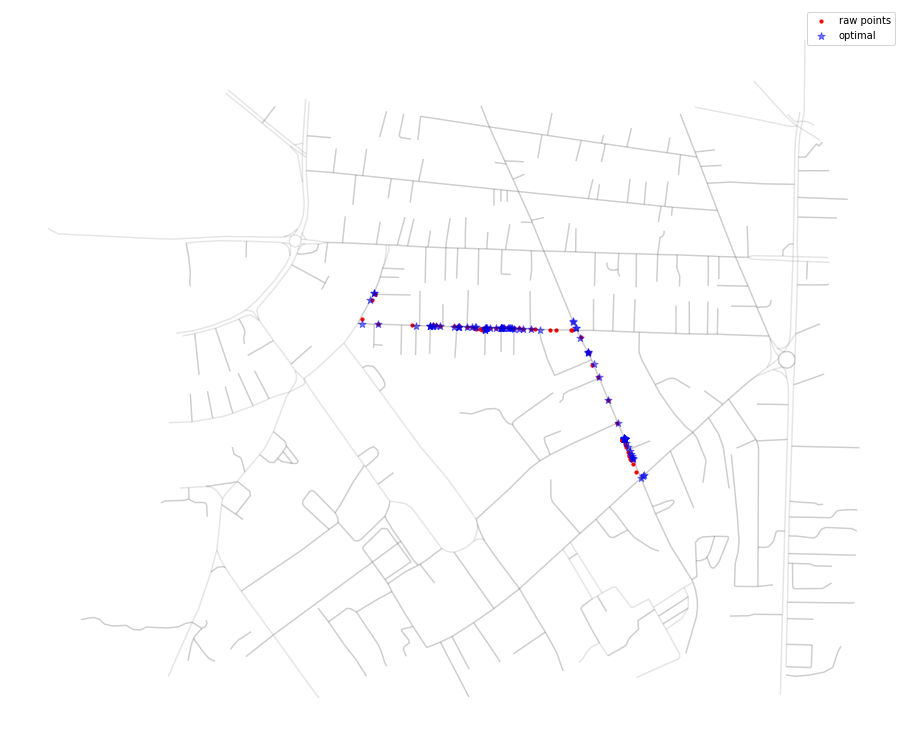

In [115]:
visualize_matching_results(trip, edge_idx, figname='matching_results_hmm_0.pdf')

In [58]:
trip['optimal candidate']

0     2
1     2
2     0
3     2
4     0
     ..
82    0
83    0
84    2
85    2
86    3
Name: optimal candidate, Length: 87, dtype: int64

In [59]:
trip['candidates'][22]

,distance,from,to,proj_point,road,highway,observation prob
0,4.482527,3924374659,5375518030,POINT (375087.2106274508 763890.1914165713),from ...,tertiary,0.036081
1,4.482527,5375518030,3924374659,POINT (375087.2106274508 763890.1914165713),from ...,tertiary,0.036081
2,12.958612,5375518029,5375518030,POINT (375100.1235591832 763885.4331855141),from ...,residential,0.017229
3,12.958612,5375518030,5375518029,POINT (375100.1235591832 763885.4331855141),from ...,residential,0.017229


In [60]:
trip['weights'].iloc[2][0]

,from_id,to_id,sp distance,gc distance,sp edges,transition prob,weight_sum
0,0,0,23.206870,22.23718,"[[2419532368, 2419532369, LINESTRING (374886.1...",0.009903,-4.793149
1,1,0,224.065356,22.23718,"[[2419532369, 2419532368, LINESTRING (374779.8...",0.001329,-6.801734
2,2,0,22.057759,22.23718,"[[5375536094, 2419532369, LINESTRING (374799.0...",0.009982,-4.772102
3,3,0,121.381459,22.23718,"[[2419532369, 5375536094, LINESTRING (374779.8...",0.003710,-5.761768


In [61]:
from scipy import stats

In [62]:
stats.norm.pdf(3,0,1)

0.0044318484119380075

In [63]:
gpd_edges_utm.head(10)

,from,to,geometry,length,highway,bbox,max speed
0,245519560,245519575,"LINESTRING (397331.136 736776.325, 397342.285 ...",148.019,secondary,"(397331.1361488708, 736639.4074819647, 397384....",19.44
1,245519560,5176906299,"LINESTRING (397331.136 736776.325, 397322.799 ...",60.641,secondary,"(397315.4396285781, 736776.3248419286, 397331....",19.44
2,245519560,7448531613,"LINESTRING (397331.136 736776.325, 397292.662 ...",164.582,residential,"(397200.6379563609, 736692.2725808757, 397331....",13.89
3,245519575,245519579,"LINESTRING (397384.215 736639.407, 397347.099 ...",228.132,secondary,"(397165.2158552303, 736579.1114031723, 397384....",19.44
4,245519575,5016718667,"LINESTRING (397384.215 736639.407, 397399.075 ...",250.299,secondary,"(397384.2154834146, 736398.5668867913, 397435....",19.44
5,245519575,245519560,"LINESTRING (397384.215 736639.407, 397364.005 ...",148.019,secondary,"(397331.1361488708, 736639.4074819647, 397384....",19.44
6,245519575,1431370044,"LINESTRING (397384.215 736639.407, 397447.895 ...",324.992,residential,"(397384.2154834146, 736639.4074819647, 397645....",13.89
7,5176906299,245519560,"LINESTRING (397315.879 736834.077, 397315.440 ...",60.641,secondary,"(397315.4396285781, 736776.3248419286, 397331....",19.44
8,5176906299,8005079395,"LINESTRING (397315.879 736834.077, 397316.282 ...",217.180,secondary,"(397298.2973129766, 736834.0767329615, 397316....",19.44
9,5176906299,8005014463,"LINESTRING (397315.879 736834.077, 397298.053 ...",79.338,residential,"(397242.7571625962, 736805.5905114051, 397315....",13.89


In [64]:
print road_graph_utm[296058885][1628753289][0]['geometry']

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(road_graph_utm[296058885][1628753289][0]['geometry'])? (<ipython-input-64-ea3e204cd6ee>, line 1)

In [ ]:
print road_graph_utm[1628753289][296058885][0]['geometry']

In [ ]:
import math

In [ ]:
math.log(0.0001)

In [ ]:
math.log(0.001)

In [ ]:
trip.iloc[0]['candidates'].apply(lambda x: math.log(x['observation prob']), axis=1)